In [1]:
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Embedding
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
data = pd.read_csv(r"C:\Users\faeze\Desktop\train.csv", encoding='iso-8859-1')

In [3]:
data.shape

(99989, 3)

In [4]:
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


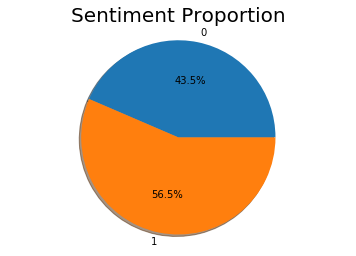

In [5]:
labels = ['0', '1']
sizes = [data['Sentiment'].value_counts()[0],
         data['Sentiment'].value_counts()[1] ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Sentiment Proportion', fontsize=20)
plt.show()

In [6]:
X = data.SentimentText
y = data.Sentiment

In [7]:
labels=[]
for i in y:x
    labels.append(i)

In [8]:
texts = []
for j in X:
    texts.append(j)

In [9]:
texts[0]

'                     is so sad for my APL friend.............'

In [10]:
max_words = 10000
maxlen = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [11]:
X = preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)

In [12]:
np.random.shuffle(X)
X_train, X_test, y_txrain, y_test = train_test_split(X, labels, test_size=0.2, random_state=100)

In [13]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [14]:
labels = np.asarray(labels)

In [30]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer = 'rmsprop',loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))

Train on 78991 samples, validate on 1000 samples
Epoch 1/5
78991/78991 [==============================] - 94s 1ms/step - loss: 0.6931 - acc: 0.5434 - val_loss: 0.7042 - val_acc: 0.5730
Epoch 2/5
78991/78991 [==============================] - 107s 1ms/step - loss: 0.6846 - acc: 0.5597 - val_loss: 0.6898 - val_acc: 0.5370
Epoch 3/5
78991/78991 [==============================] - 112s 1ms/step - loss: 0.6453 - acc: 0.6241 - val_loss: 0.7254 - val_acc: 0.5200
Epoch 4/5
78991/78991 [==============================] - 119s 2ms/step - loss: 0.5766 - acc: 0.6915 - val_loss: 0.7538 - val_acc: 0.5260
Epoch 5/5
78991/78991 [==============================] - 126s 2ms/step - loss: 0.5103 - acc: 0.7383 - val_loss: 0.8526 - val_acc: 0.4950


In [ ]:
result = model.evaluate(X_test, y_test)
result

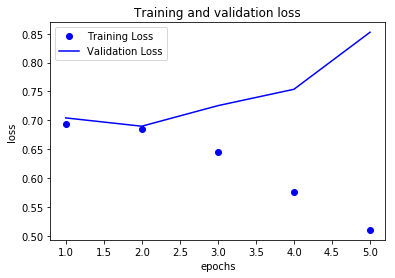

In [32]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

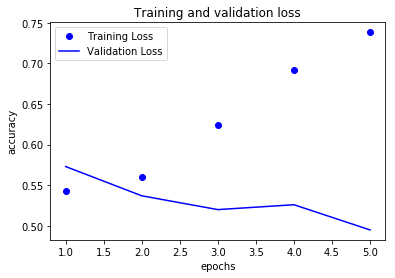

In [33]:
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()